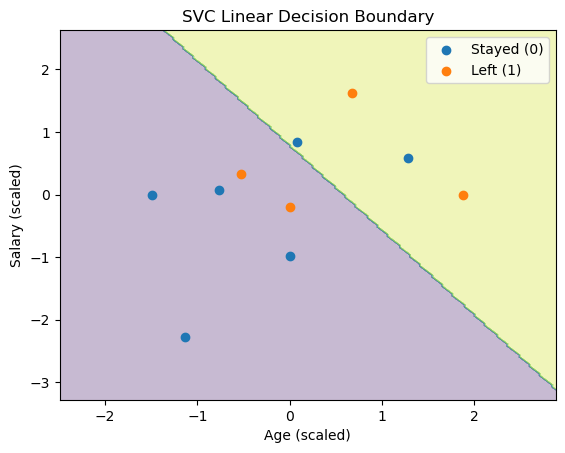

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# ---------------------------------------------------
# 1. Create dataset
# ---------------------------------------------------
data = {
    'Age': [25, 30, np.nan, 22, 40, 35, np.nan, 28, 50, 45],
    'Salary': [50000, 60000, 55000, np.nan, 65000, 62000, 58000, 59000, np.nan, 61000],
    'Department': ['Sales', 'Engineering', 'Sales', 'Marketing',
                   'Engineering', 'Marketing', 'Sales', np.nan,
                   'Engineering', 'Marketing'],
    'LeftCompany': [0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
}

df = pd.DataFrame(data)

# ---------------------------------------------------
# 2. Handle missing values
# ---------------------------------------------------
num_imputer = SimpleImputer(strategy='mean')
df[['Age', 'Salary']] = num_imputer.fit_transform(df[['Age', 'Salary']])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[['Department']] = cat_imputer.fit_transform(df[['Department']])

# ---------------------------------------------------
# 3. Select features and target
#    (Only Age & Salary for 2D SVC plot)
# ---------------------------------------------------
X = df[['Age', 'Salary']]
y = df['LeftCompany']

# ---------------------------------------------------
# 4. Feature scaling
# ---------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------
# 5. Train SVC model (linear kernel)
# ---------------------------------------------------
svc = SVC(kernel='linear')
svc.fit(X_scaled, y)

# ---------------------------------------------------
# 6. Plot decision boundary
# ---------------------------------------------------
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], label='Stayed (0)')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], label='Left (1)')

plt.xlabel('Age (scaled)')
plt.ylabel('Salary (scaled)')
plt.title('SVC Linear Decision Boundary')
plt.legend()
plt.show()
